In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.shape

(10000, 11)

In [8]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

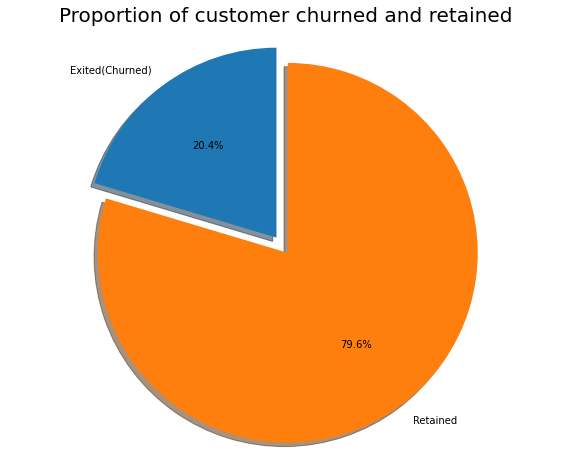

In [10]:
labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [11]:
import seaborn as sns

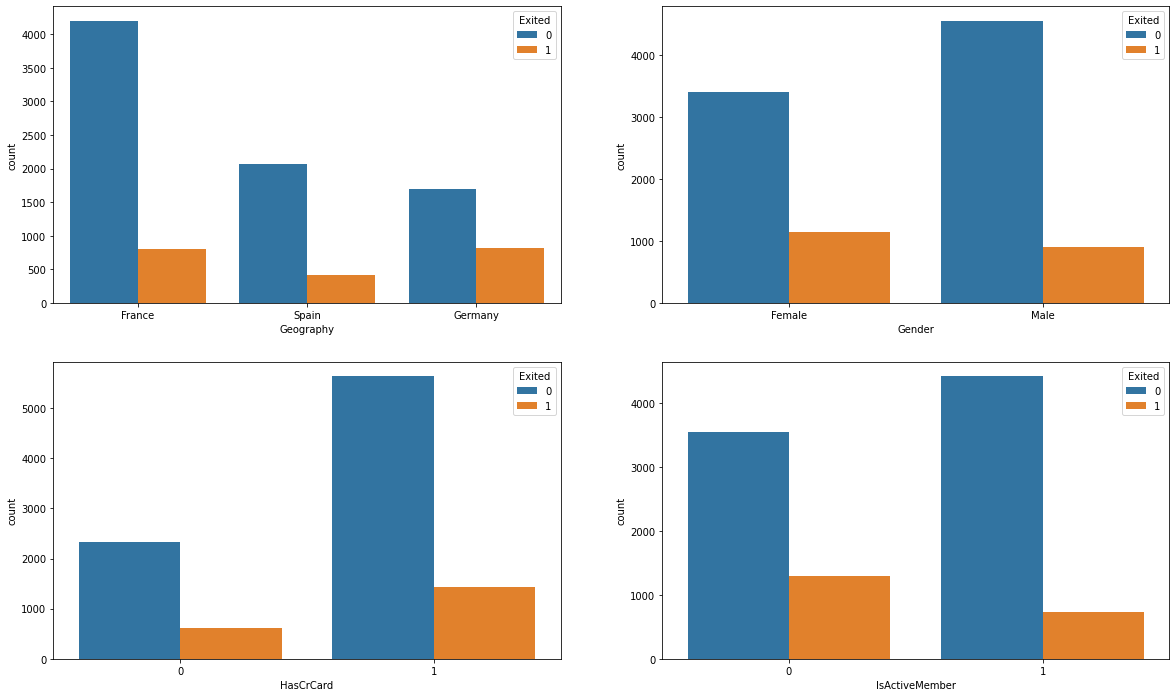

In [13]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

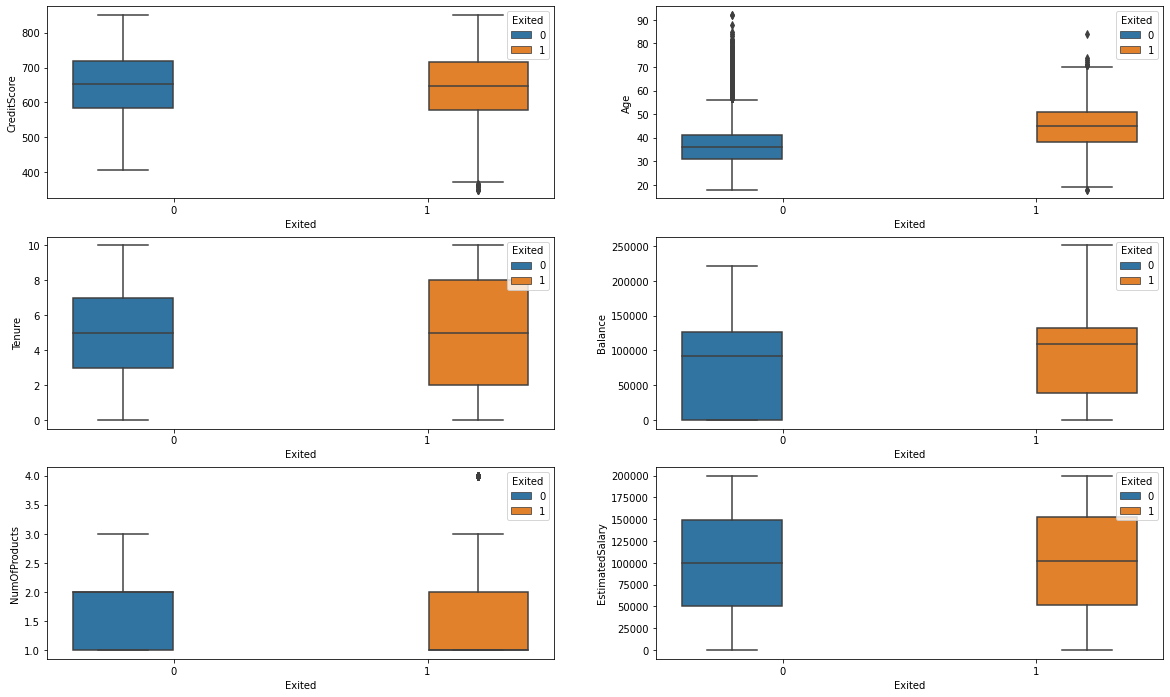

In [14]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


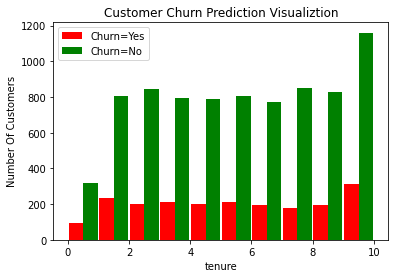

In [15]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

# Making a new column BalanceSalaryRatio

(-1.0, 5.0)

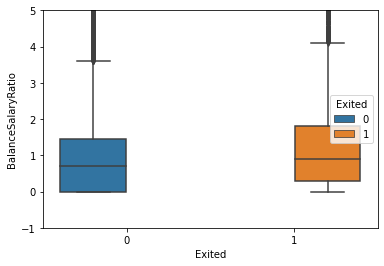

In [16]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

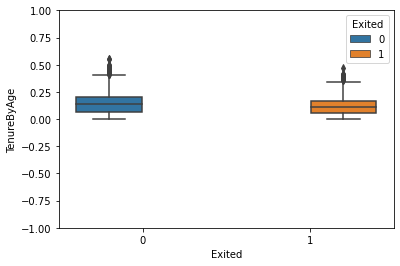

In [17]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

In [18]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [19]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [20]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

In [21]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,0,1


In [22]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [23]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,0,0,1


In [25]:
X = df1.drop('Exited',axis='columns')  ##independent features
y = df1['Exited']  ##dependent feature

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [26]:
len(X_train.columns)

14

In [28]:
import tensorflow as tf
from tensorflow import keras

In [32]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(None,32,14), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5953 - accuracy: 0.7384
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.7947
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.7958
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7975
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4537 - accuracy: 0.8046
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8087
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.8104
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.8127
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8144
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4307 - accura

In [36]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8485


[0.35472437739372253, 0.8485000133514404]

In [37]:
yp = model.predict(X_test)
yp

array([[0.03460848],
       [0.06714579],
       [0.06932247],
       ...,
       [0.01864192],
       [0.01413256],
       [0.03219754]], dtype=float32)

In [38]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [39]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [40]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.67      0.49      0.57       405

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

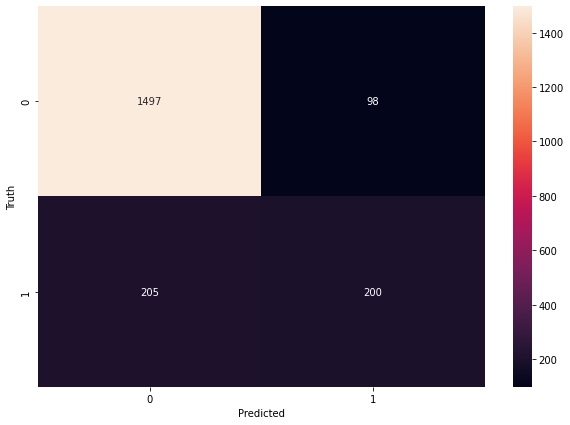

In [41]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
from sklearn.metrics import accuracy_score
print("Accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score is:  84.85000000000001 %
